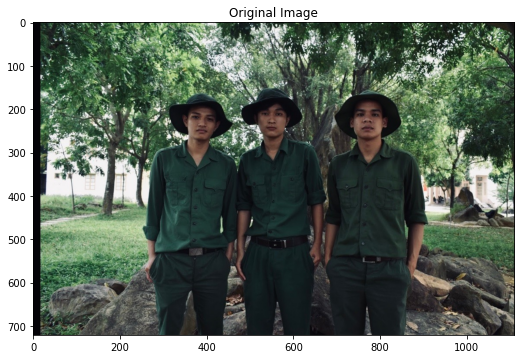

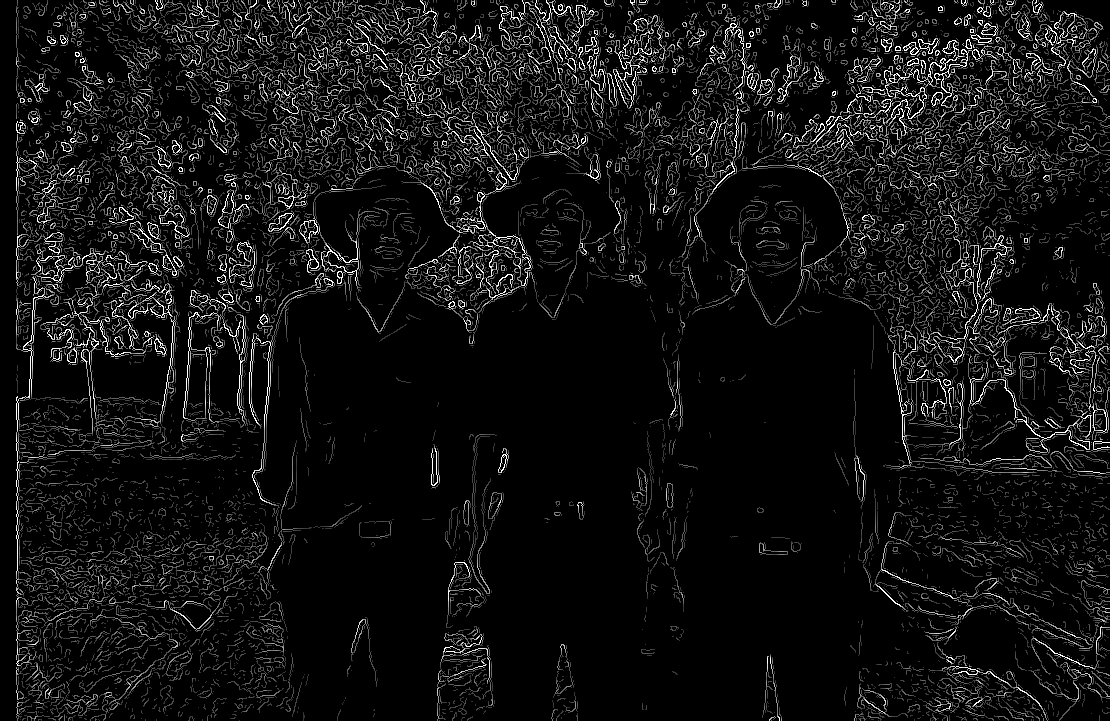

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Xác định chức năng phát hiện Canny
# Ở đây weak_th và strong_th là các ngưỡng cho
# Ngưỡng gấp đôi bước
def Canny_detector(img, weak_th = None, strong_th = None):
	# Chuyển đổi hình ảnh sang thang độ xám
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	# Bước giảm tiếng ồn
	img = cv2.GaussianBlur(img, (5, 5), 1.4)
	
	# Tính toán độ dốc
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
	
	# Chuyển đổi tọa độ Descartes sang cực
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
	# Đặt ngưỡng tối thiểu và tối đa
	# Để lập ngưỡng kép
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# Nhận kích thước của ảnh đầu vào
	height, width = img.shape
	
	# Lặp qua từng pixel của hình ảnh
	# image
	for i_x in range(width):
		for i_y in range(height):
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			# Chọn các vùng lân cận của pixel mục tiêu
			# Theo hướng gradient
			# Theo hướng trục x
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Hướng trên cùng bên phải(chéo - 1)
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# Theo hướng trục y
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# Hướng trên cùng bên trái(chéo - 2)
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Bây giờ nó khởi động lại chu kì
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Non-maximum suppression step (Bước triệt tiêu không tối đa)
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
	# Ngưỡng gấp đôi bước
	for i_x in range(width):
		for i_y in range(height):
			grad_mag = mag[i_y, i_x]
			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	# Cuối cùng trả về độ lớn của
	# gradients của các cạnh
	return mag

frame = cv2.imread('/content/qs.jpg')
# Gọi hàm được thiết
# Tìm cạnh
canny_img = Canny_detector(frame)
# Hiện thị ảnh đầu vào và đầu ra
row = 1
column = 5
fig = plt.figure(figsize=[50,50])
ax1 = fig.add_subplot(row, column, 1)
plt.imshow(frame[:,:,::-1])
ax1.title.set_text('Original Image')
plt.show()
cv2_imshow(canny_img)

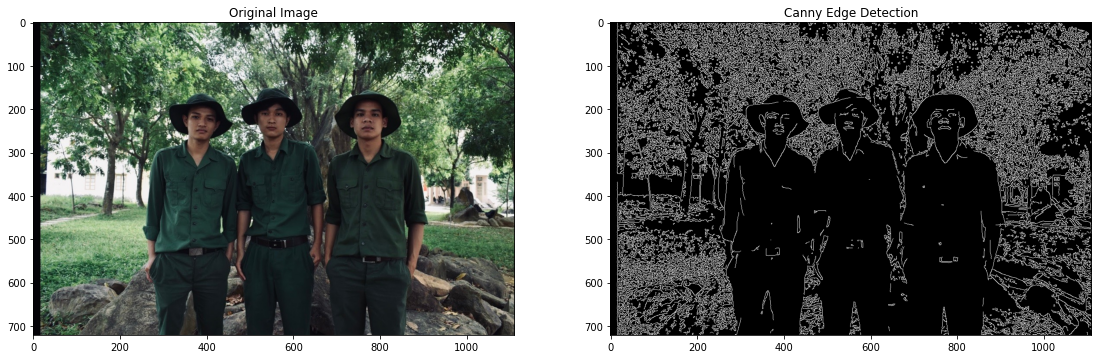

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/qs.jpg')
edges = cv.Canny(img,100,200)
row = 1
column = 5
fig = plt.figure(figsize=[50,50])
ax1 = fig.add_subplot(row, column, 1)
plt.imshow(img[:,:,::-1])
ax2 = fig.add_subplot(row, column, 2)
plt.imshow(edges, cmap= 'gray')
ax1.title.set_text('Original Image')
ax2.title.set_text('Canny Edge Detection')
plt.show()
# cv2_imshow(edges)